In [1]:
#Show random examples from each dataset
import os
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm_notebook as tqdm

In [9]:
n_cols = 5
n_rows = 3

n_images = n_cols*n_rows

def display_images(glob_path):
    fps = glob.glob(glob_path, recursive=True)
    image_files = [fp for fp in fps if fp.endswith(('tif','tiff','png','jpg'))]
    print('Number of images: %s'%len(image_files))
    fps_subset = np.random.choice(image_files, size=n_images)

    fig = plt.figure(figsize=(n_cols*2, n_rows*2))

    for i in range(1, len(fps_subset)+1):
        try:
            img = cv2.imread(fps_subset[i-1])
            fig.add_subplot(n_rows, n_cols, i)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        except Exception as ex:
            print('Exception: %s'%ex)
            pass
    plt.show()

In [33]:
#blur washington
fps = glob.glob("/home/rob/HWR/datasets/IAMHist/washingtondb-v1.0/washingtondb-v1.0/*/*/*.png")

for fp in fps:
    img = cv2.imread(fp)
    img = cv2.GaussianBlur(img,(11,11),1.5)
    #cv2.imwrite(fp,img)

In [4]:
glob.glob("/home/rob/HWR/datasets/IAMHist/washingtondb-v1.0/washingtondb-v1.0/*/*/*.png")

['/home/rob/HWR/datasets/IAMHist/washingtondb-v1.0/washingtondb-v1.0/data/word_images_normalized/271-13-05.png',
 '/home/rob/HWR/datasets/IAMHist/washingtondb-v1.0/washingtondb-v1.0/data/word_images_normalized/304-07-04.png',
 '/home/rob/HWR/datasets/IAMHist/washingtondb-v1.0/washingtondb-v1.0/data/word_images_normalized/309-09-01.png',
 '/home/rob/HWR/datasets/IAMHist/washingtondb-v1.0/washingtondb-v1.0/data/word_images_normalized/277-12-08.png',
 '/home/rob/HWR/datasets/IAMHist/washingtondb-v1.0/washingtondb-v1.0/data/word_images_normalized/272-30-10.png',
 '/home/rob/HWR/datasets/IAMHist/washingtondb-v1.0/washingtondb-v1.0/data/word_images_normalized/301-34-05.png',
 '/home/rob/HWR/datasets/IAMHist/washingtondb-v1.0/washingtondb-v1.0/data/word_images_normalized/301-10-06.png',
 '/home/rob/HWR/datasets/IAMHist/washingtondb-v1.0/washingtondb-v1.0/data/word_images_normalized/273-13-10.png',
 '/home/rob/HWR/datasets/IAMHist/washingtondb-v1.0/washingtondb-v1.0/data/word_images_normalized

/home/rob/HWR/datasets/IAM/words/*/*/*.png 0 0.5111111111111111 1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


wtfmate



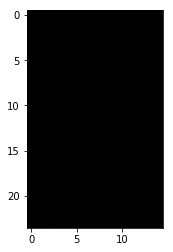

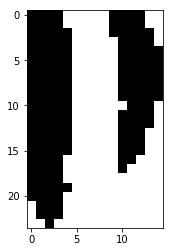

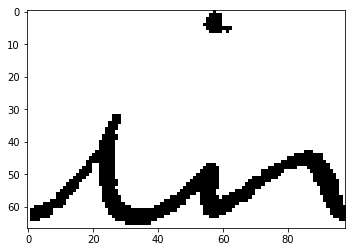

In [28]:
#normalize datasets
globs = [
        "/home/rob/HWR/datasets/IAM/words/*/*/*.png","/home/rob/HWR/datasets/cvl/*/*/*/*.tif",
        "/home/rob/HWR/datasets/IAMHist/washingtondb-v1.0/washingtondb-v1.0/*/*/*.png",
        "/home/rob/HWR/datasets/RIMES/*/*/*/*/*.tiff",
         "/home/rob/HWR/datasets/mnist/**/*.png"]

for _glob in globs:
    fps = glob.glob(_glob)
    fp = np.random.choice(fps)
    img = cv2.imread(fp)
    print(_glob,img.min(),img.mean(),img.max())
    #img = cv2.imread("lenacolor512.tiff", cv2.IMREAD_COLOR)  # uint8 image
    norm_image = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    plt.figure()
    plt.imshow(img)
    plt.figure()
    plt.imshow(norm_image)
    for fp in tqdm(fps):
        #try:
        img = cv2.imread(fp, cv2.IMREAD_COLOR)
        img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)*255

        #cv2.imwrite(fp+'xx',img)
        print('wtfmate')
        #except:
        #    print('failed')
        plt.figure()
        plt.imshow(img)
        break
    break

/home/rob/HWR/datasets/zooniverse/words/*.jpg 89 238.03055555555557 255



/home/rob/HWR/datasets/Aarhus/words/*.jpg 70 243.26746411483253 255



/home/rob/HWR/datasets/Copenhagen/Words/*.jpg 150 240.85992805755396 255


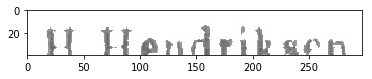

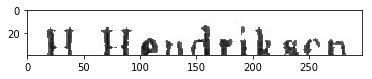

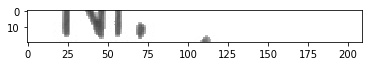

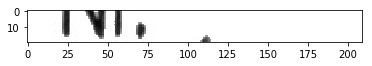

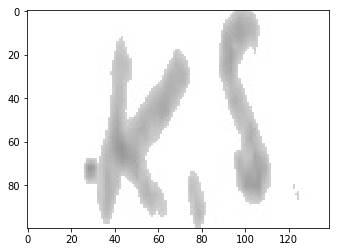

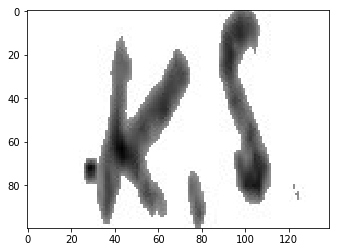

In [12]:
#normalize datasets
globs = ["/home/rob/HWR/datasets/zooniverse/words/*.jpg",
         "/home/rob/HWR/datasets/Aarhus/words/*.jpg",
         "/home/rob/HWR/datasets/Copenhagen/Words/*.jpg"
        ]

for _glob in globs:
    fps = glob.glob(_glob)
    fp = np.random.choice(fps)
    img = cv2.imread(fp)
    print(_glob,img.min(),img.mean(),img.max())
    #img = cv2.imread("lenacolor512.tiff", cv2.IMREAD_COLOR)  # uint8 image
    norm_image = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    plt.figure()
    plt.imshow(img)
    plt.figure()
    plt.imshow(norm_image)
    for fp in tqdm(fps):
        try:
            img = cv2.imread(fp, cv2.IMREAD_COLOR)
            img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
            cv2.imwrite(fp,img)
        except:
            print('failed')
        #plt.imshow(img)

In [3]:
#greyscale
globs = ["/home/rob/HWR/datasets/cvl/*/*/*/*.tif",
    "/home/rob/HWR/datasets/IAMHist/washingtondb-v1.0/washingtondb-v1.0/*/*/*.png",
        "/home/rob/HWR/datasets/IAM/words/*/*/*.png",
        "/home/rob/HWR/datasets/RIMES/*/*/*/*/*.tiff",
         "/home/rob/HWR/datasets/mnist/**/*.png"]

for _glob in globs:
    fps = glob.glob(_glob)
    for fp in tqdm(fps):
        try:
            img = cv2.imread(fp)
            img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            img = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
            cv2.imwrite(fp,img)
        except:
            print('failed')
        #plt.imshow(img)

failed
failed



In [61]:
fp

'/home/rob/HWR/datasets/IAMHist/washingtondb-v1.0/washingtondb-v1.0/data/word_images_normalized/276-22-01.png'

Number of images: 115320


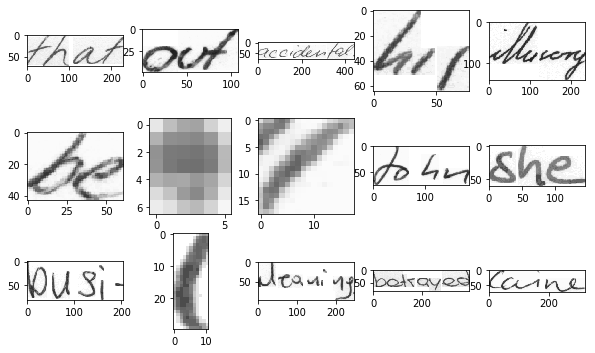

In [10]:
#IAM Database
glob_path = "/home/rob/HWR/datasets/IAM/words/**/*.png"
display_images(glob_path)

Number of images: 4894


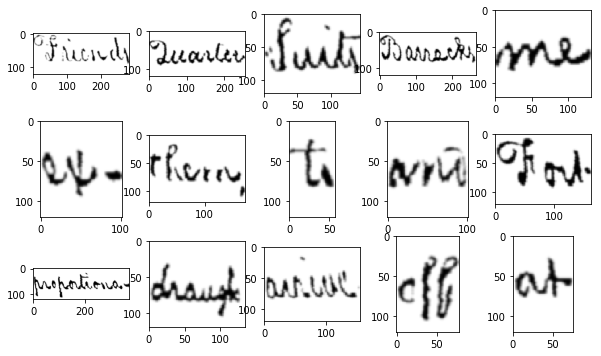

In [11]:
#Washington Database
glob_path = "/home/rob/HWR/datasets/IAMHist/washingtondb-v1.0/washingtondb-v1.0/**/*.png"
display_images(glob_path)

Number of images: 99904


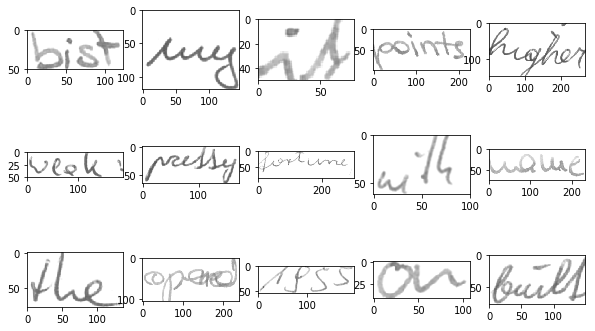

In [12]:
#CVL Database
glob_path = "/home/rob/HWR/datasets/cvl/**/*.tif"
display_images(glob_path)

Number of images: 66978


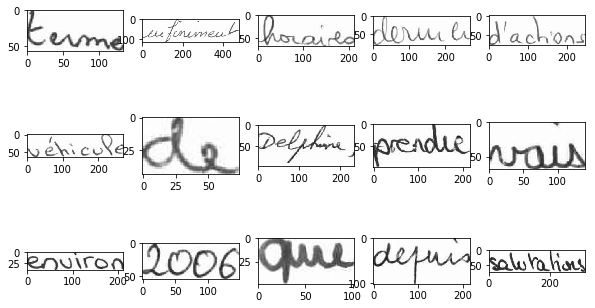

In [13]:
#RIMES Database
glob_path = "/home/rob/HWR/datasets/RIMES/**/*.tiff"
display_images(glob_path)

Number of images: 70000


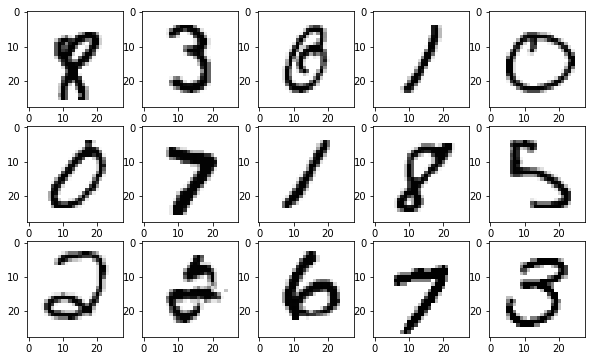

In [14]:
#MNIST Database
glob_path = "/home/rob/HWR/datasets/mnist/**/*.png"
display_images(glob_path)